# Explore here

In [1]:
import pandas as pd

df = pd.read_csv('../data/raw/acea-water-prediction/Aquifer_Auser.csv')
df

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
0,05/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,0.0,10.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,07/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.20,0.0,10.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,13.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09/03/1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.40,0.0,12.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,26/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.75,0.0,23.75,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.20,-1.03
8150,27/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.35,0.0,24.30,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.21,-1.03
8151,28/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.75,0.0,24.55,-6829.936207,-7455.505,-8724.261667,-5809.63,-3000.1,0.23,-1.03
8152,29/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.90,0.0,23.60,-7189.406533,-7847.900,-9183.433333,-6115.40,-3158.0,0.23,-1.02


In [2]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [ ]:
df = df.sort_values('Date')
diferencias = df['Date'].diff()

In [4]:
saltos = diferencias[diferencias > pd.Timedelta(days=1)]

print(f"Número de saltos temporales: {len(saltos)}")
print(f"El salto más grande es de: {saltos.max()}")
print(f"Total de días desaparecidos: {saltos.sum()}")

Número de saltos temporales: 0
El salto más grande es de: NaT
Total de días desaparecidos: 0 days 00:00:00


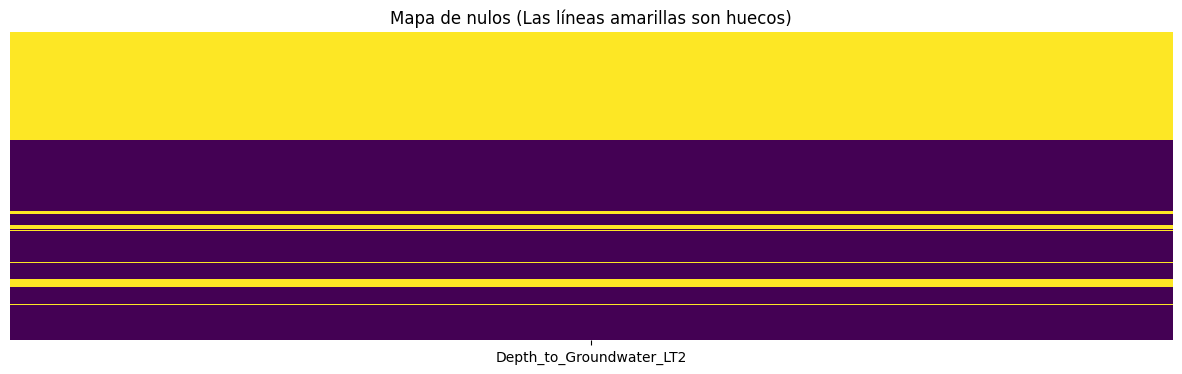

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 4))
sns.heatmap(df[['Depth_to_Groundwater_LT2']].isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Mapa de nulos (Las líneas amarillas son huecos)')
plt.show()

En este mapa de calor podemos ver la cantidad de datos nulos que hay, la mayoria o gran parte esta al principio por lo que vamos a empezar nuestra serie de tiempo desde el primer dato valido, y luego trataremos los nulos que hay entre medio interpolando los datos.

In [6]:
primer_indice_valido = df['Depth_to_Groundwater_LT2'].first_valid_index()
df_trimmed = df.loc[primer_indice_valido:].copy()

df_trimmed

,Date,Rainfall_Gallicano,Rainfall_Pontetetto,Rainfall_Monte_Serra,Rainfall_Orentano,Rainfall_Borgo_a_Mozzano,Rainfall_Piaggione,Rainfall_Calavorno,Rainfall_Croce_Arcana,Rainfall_Tereglio_Coreglia_Antelminelli,...,Temperature_Monte_Serra,Temperature_Ponte_a_Moriano,Temperature_Lucca_Orto_Botanico,Volume_POL,Volume_CC1,Volume_CC2,Volume_CSA,Volume_CSAL,Hydrometry_Monte_S_Quirico,Hydrometry_Piaggione
2859,2006-01-01,37.2,26.0,21.4,43.2,29.4,35.2,31.2,0.0,11.2,...,0.00,5.10,5.80,-10355.061290,-17331.98265,-12716.707350,0.00,0.0,0.50,0.57
2860,2006-01-02,3.2,8.4,0.2,8.0,6.0,7.4,3.6,0.0,0.0,...,0.00,5.55,5.30,-10900.064520,-18244.19226,-13386.007740,0.00,0.0,0.53,0.72
2861,2006-01-03,0.2,0.0,0.0,0.2,0.0,0.2,0.0,0.0,0.2,...,0.00,6.25,6.15,-10900.064520,-18244.19226,-13386.007740,0.00,0.0,0.48,0.47
2862,2006-01-04,0.0,0.2,0.0,0.0,0.0,0.0,0.2,0.0,0.0,...,0.00,3.80,3.80,-10900.064520,-18244.19226,-13386.007740,0.00,0.0,0.43,0.21
2863,2006-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,4.35,4.20,-10900.064520,-18244.19226,-13386.007740,0.00,0.0,0.38,0.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8149,2020-06-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,20.75,0.00,23.75,-7189.406533,-7847.90000,-9183.433333,-6115.40,-3158.0,0.20,-1.03
8150,2020-06-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.35,0.00,24.30,-7189.406533,-7847.90000,-9183.433333,-6115.40,-3158.0,0.21,-1.03
8151,2020-06-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,21.75,0.00,24.55,-6829.936207,-7455.50500,-8724.261667,-5809.63,-3000.1,0.23,-1.03
8152,2020-06-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,18.90,0.00,23.60,-7189.406533,-7847.90000,-9183.433333,-6115.40,-3158.0,0.23,-1.02


In [16]:
(df_trimmed['Depth_to_Groundwater_LT2'] == 0).sum()

np.int64(2)

Calculamos los valores en 0 que hay dentro de Depth_to_Groundwater_LT2, ya que es un valor atipico, y solo tenemos dos datos, lo manipularemos al igual que un valor nulo.

In [18]:
import numpy as np
df_trimmed.loc[df_trimmed['Depth_to_Groundwater_LT2'] == 0, 'Depth_to_Groundwater_LT2'] = np.nan
(df_trimmed['Depth_to_Groundwater_LT2'] == 0).sum()

np.int64(0)

In [19]:
print(df_trimmed.index.name)

Date


In [21]:
df_trimmed['Depth_to_Groundwater_LT2'] = df_trimmed['Depth_to_Groundwater_LT2'].interpolate(method='time')
df_trimmed['Depth_to_Groundwater_LT2']

Date
2006-01-01   -14.94
2006-01-02   -14.96
2006-01-03   -15.02
2006-01-04   -15.02
2006-01-05   -15.02
              ...  
2020-06-26   -12.36
2020-06-27   -12.36
2020-06-28   -12.37
2020-06-29   -12.36
2020-06-30   -12.38
Name: Depth_to_Groundwater_LT2, Length: 5295, dtype: float64

Ahora con todos los datos limpio y sin nulos o outliers, creamos la serie de tiempo

In [22]:
ts = df_trimmed[['Depth_to_Groundwater_LT2']]
ts

,Depth_to_Groundwater_LT2
Date,
2006-01-01,-14.94
2006-01-02,-14.96
2006-01-03,-15.02
2006-01-04,-15.02
2006-01-05,-15.02
...,...
2020-06-26,-12.36
2020-06-27,-12.36
2020-06-28,-12.37


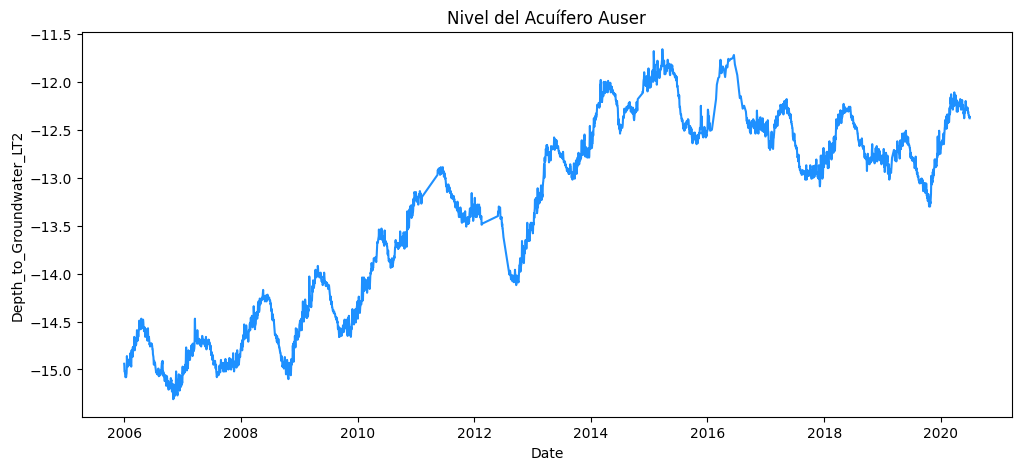

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.lineplot(x=df_trimmed.index, y=df_trimmed['Depth_to_Groundwater_LT2'], color='dodgerblue')
plt.title('Nivel del Acuífero Auser')
plt.show()

In [37]:
print(f'El tensor de la serie temporal es: {ts.index.inferred_freq}')

El tensor de la serie temporal es: D


In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts, period = 7)
decomposition

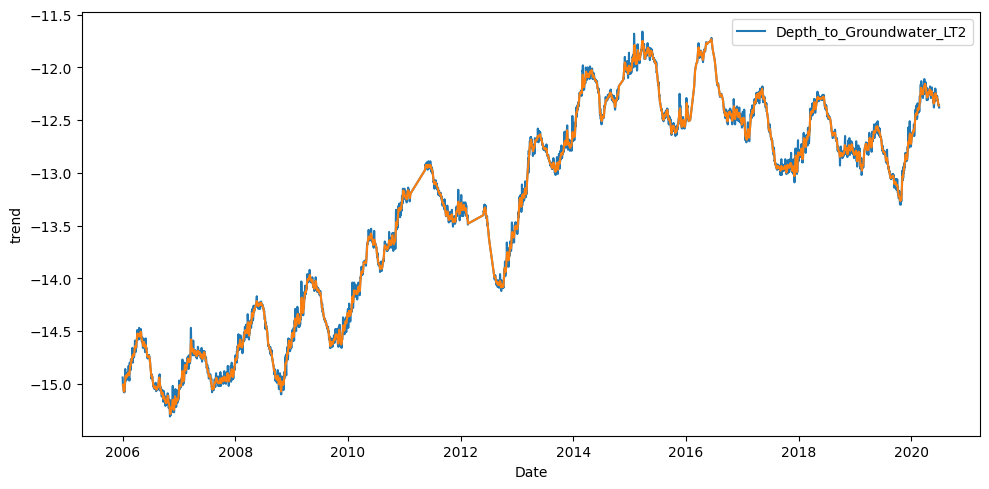

In [40]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize =(10,5))

sns.lineplot(data = ts)
sns.lineplot(data = trend)
plt.tight_layout()
plt.show()

La tendencia es positiva

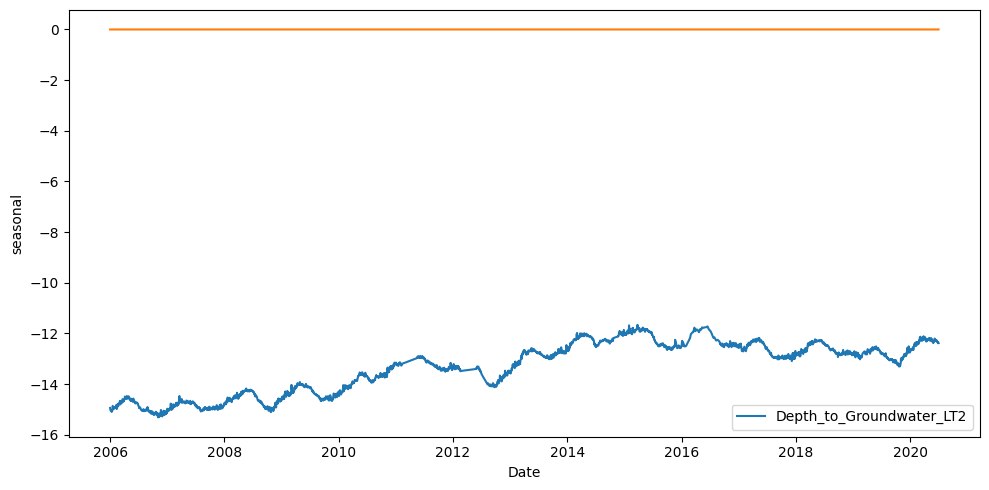

In [41]:
seasonal = decomposition.seasonal

fig,axis = plt.subplots(figsize=(10,5))
sns.lineplot(data=ts)
sns.lineplot(data=seasonal)
plt.tight_layout()
plt.show()

In [42]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    tstest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(tstest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in tstest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   -1.692293
p-value                           0.435088
#Lags Used                       29.000000
Number of Observations Used    5265.000000
Critical Value (1%)              -3.431593
Critical Value (5%)              -2.862089
Critical Value (10%)             -2.567062
dtype: float64

El p-value es mayor a 0.05 por lo tanto... La serie no es estacionaria.

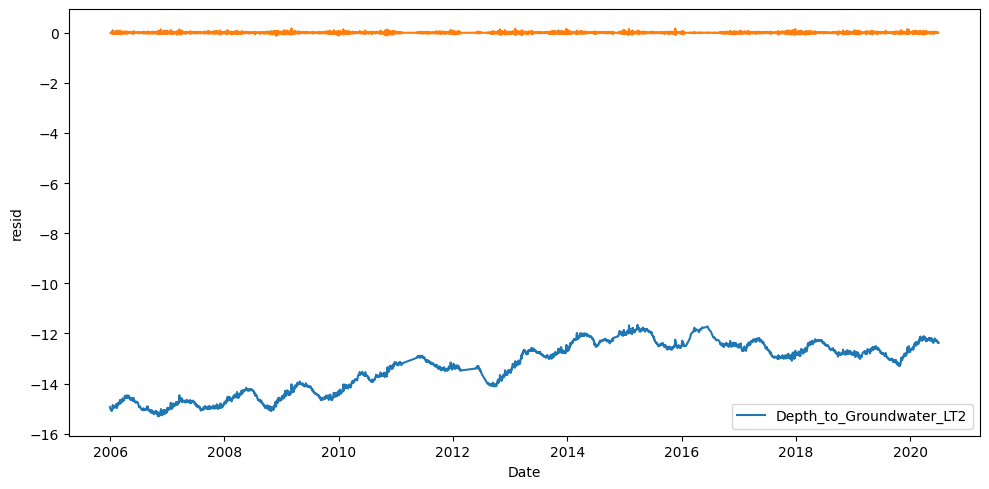

In [43]:
residuos = decomposition.resid
fig, axis = plt.subplots(figsize=(10,5))

sns.lineplot(data=ts)
sns.lineplot(data= residuos)
plt.tight_layout()
plt.show()

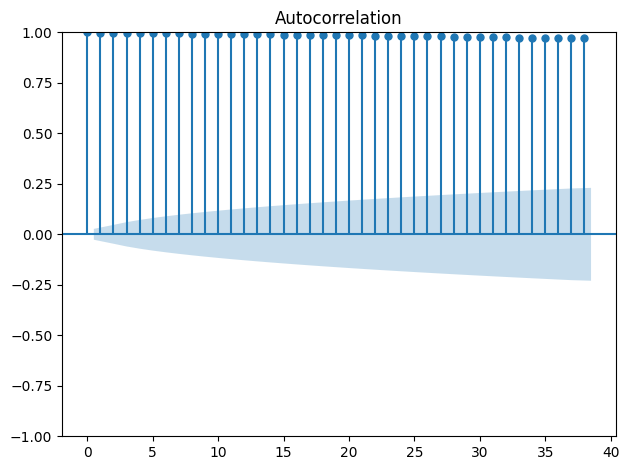

In [44]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(ts)

plt.tight_layout()

plt.show()

In [46]:
from pmdarima import auto_arima

model = auto_arima(ts, seasonal = False, trace = True, m = 365)

/home/vscode/.local/lib/python3.11/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (365) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-21971.756, Time=1.22 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-21331.927, Time=0.28 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-21493.822, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-21635.821, Time=5.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-21332.737, Time=0.74 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-21962.258, Time=7.99 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-21947.262, Time=3.09 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-21970.831, Time=2.28 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-21969.701, Time=1.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-21734.930, Time=2.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-21969.194, Time=2.58 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-21958.043, Time=5.11 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-21967.957, Time=6.99 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-21971.451, Time=0.51 sec

Best

In [47]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 5295
Model:               SARIMAX(2, 1, 2)   Log Likelihood               10991.878
Date:                Thu, 19 Feb 2026   AIC                         -21971.756
Time:                        19:03:44   BIC                         -21932.310
Sample:                    01-01-2006   HQIC                        -21957.971
                         - 06-30-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.000      1.354      0.176      -0.000       0.001
ar.L1          0.4958      0.035     14.196      0.000       0.427       0.564
ar.L2         -0.1297      0.031     -4.141      0.000      -0.191      -0.068
ma.L1         -0.2912      0.035     -8.345      0.000      -0.360      -0.223
ma.L2         -0.2240      0.032     -7.070      0.000      -0.286      -0.162
sigma2         0.0009   1.18e-05     78.220      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1928.94
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               0.97   Skew:                             0.35
Prob(H) (two-sided):                  0.50   Kurtosis:                         5.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [48]:
forecast = model.predict(365)
forecast

2020-07-01   -12.385281
2020-07-02   -12.378937
2020-07-03   -12.374802
2020-07-04   -12.373268
2020-07-05   -12.372739
                ...    
2021-06-26   -12.201265
2021-06-27   -12.200783
2021-06-28   -12.200300
2021-06-29   -12.199818
2021-06-30   -12.199336
Freq: D, Length: 365, dtype: float64

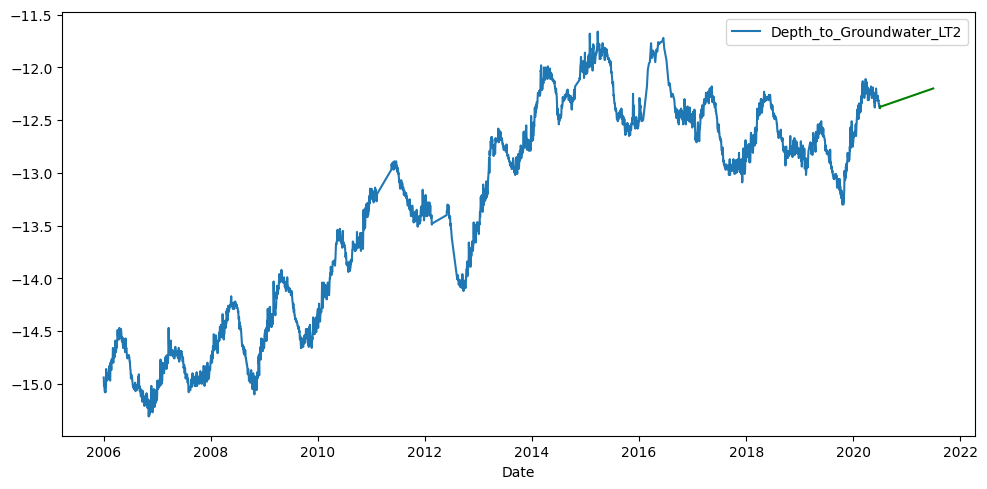

In [49]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts)
sns.lineplot(data = forecast, c = "green")

plt.tight_layout()

plt.show()